# Wine-Quality Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read data

In [2]:
file_path = 'data/winequalityN.csv'
data = pd.read_csv(file_path)

### Basic infromation about data

In [3]:
# First data rows
print("\nFirst data rows:")
print(data.head())


First data rows:
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5     

In [4]:
# Basic information about data
print("Number of rows and columns:", data.shape)
print("\nBasic information about data:")
print(data.info())

Number of rows and columns: (6497, 13)

Basic information about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660

In [5]:
# Suming nulls in every column

empty = data.isnull().sum()
percent_empty = (data.isnull().sum() / len(data)) * 100

print(empty)
print("\nPercent part of null in every column \n")
print(percent_empty)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Percent part of null in every column 

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64


In [6]:
# delete entries with at least one null
cleared_data = data.dropna()
print("After: ")
print(cleared_data.info())
print("\n Check (IF True there is no nulls in that collumn\n")
print(cleared_data.notnull().all())

After: 
<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB
None

 Check (IF True there is no nulls in that collumn

typ

In [9]:
# Descriptive statistics
# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile.
# 50% - The 50% percentile.
# 75% - The 75% percentile.
# max - the maximum value.

# Percentile - how many of the values are less than the given percentile. 
print("\nDescriptive statistics:")
print(cleared_data.describe())


Descriptive statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000     

## 2. Data visualization

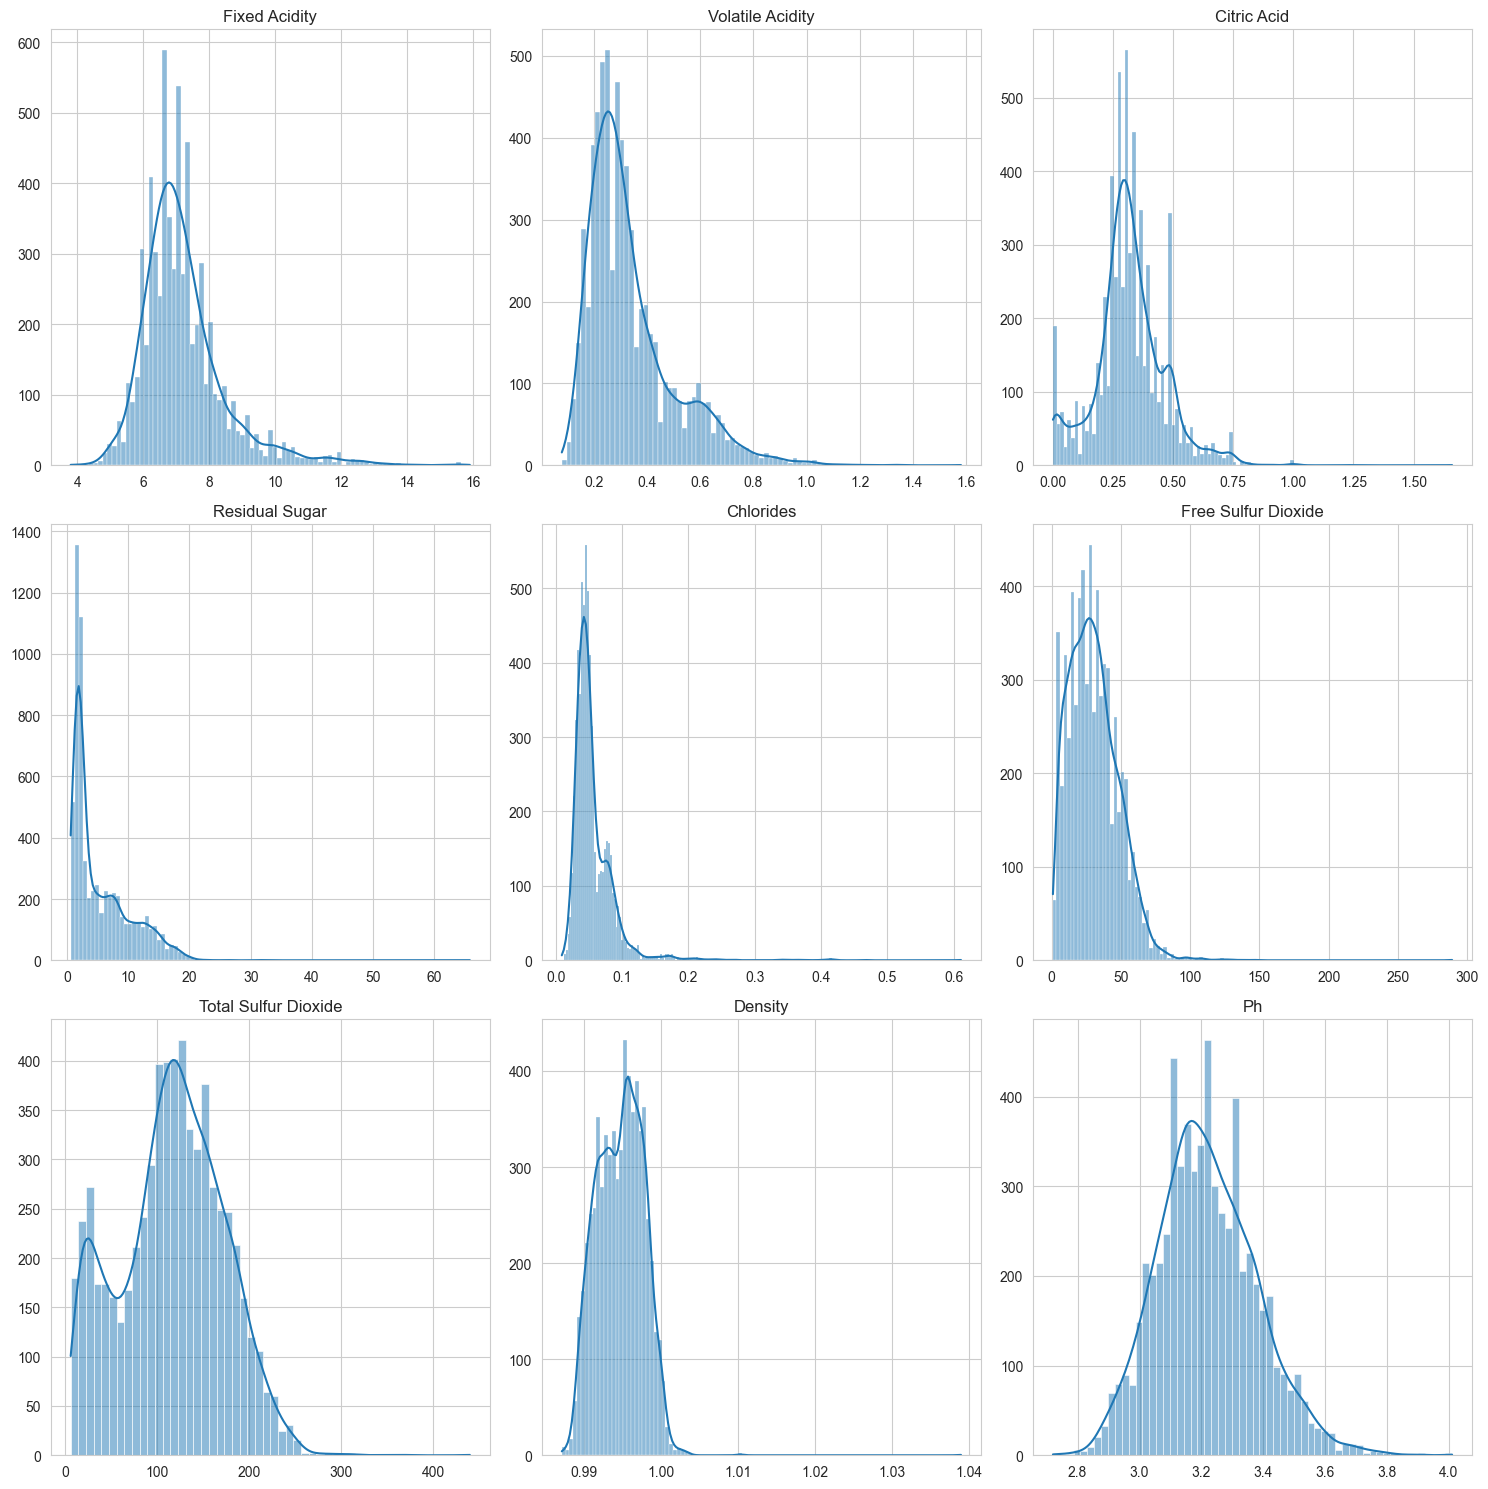

In [18]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure for multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# List of columns for distribution plots
columns_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH']

# Plotting distributions of various chemical characteristics
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(cleared_data[col], kde=True, ax=ax)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

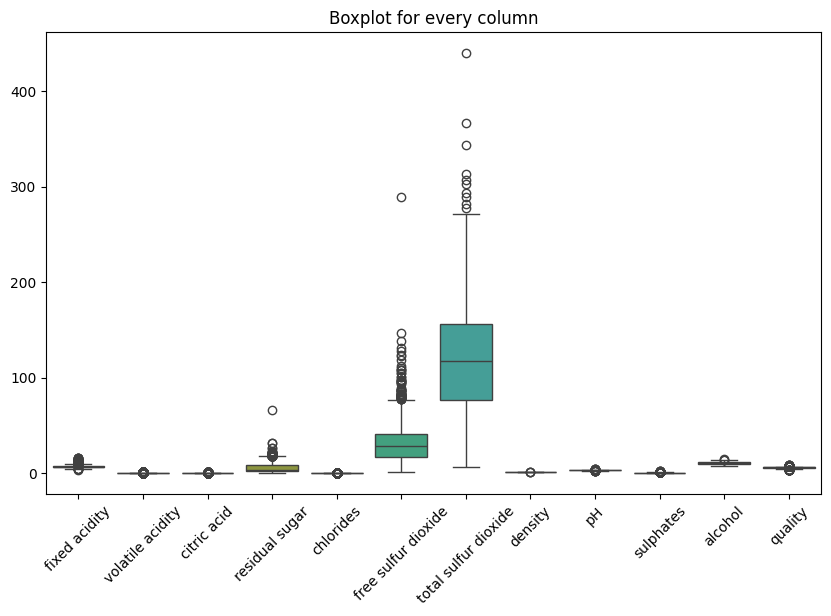

In [19]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleared_data)
plt.xticks(rotation=45) 
plt.title('Boxplot for every column')
plt.show()

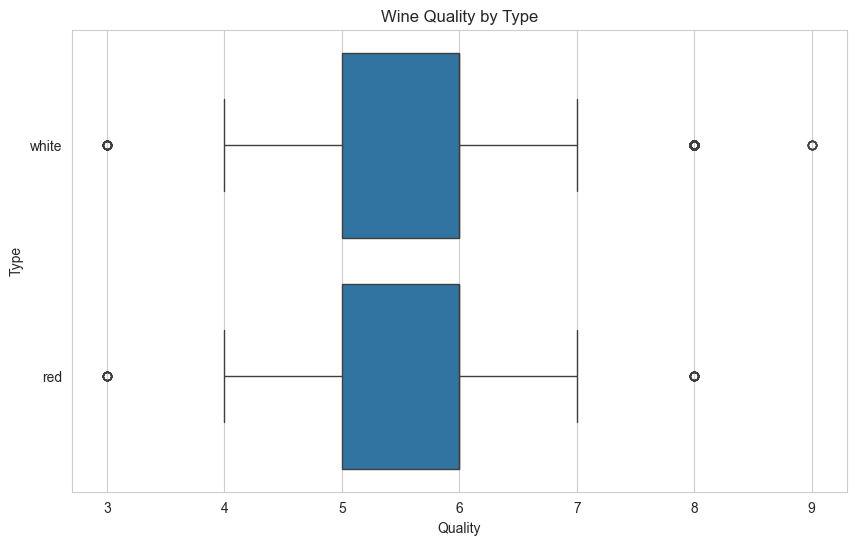

In [13]:
# Boxplot to compare wine quality across different types
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='type', data=cleared_data, orient='h')
plt.title('Wine Quality by Type')
plt.xlabel('Quality')
plt.ylabel('Type')
plt.show()

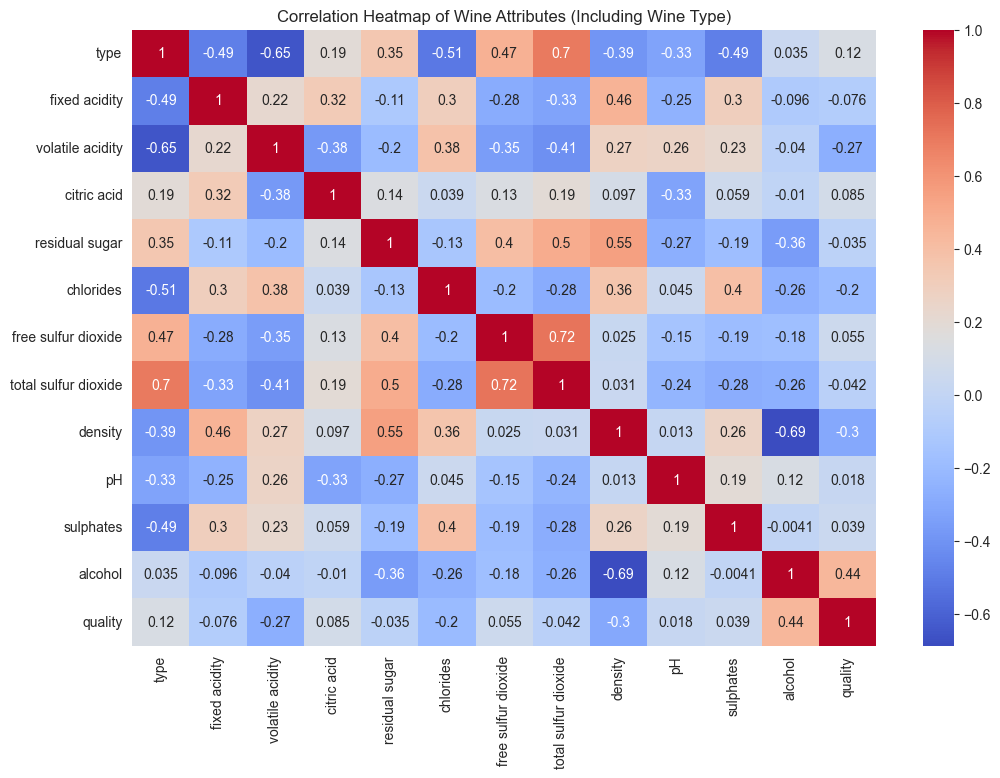

In [17]:
# Converting the 'type' column to numeric values
# Assigning 0 to 'red' and 1 to 'white'
wine_data_numeric = cleared_data.copy()
wine_data_numeric['type'] = wine_data_numeric['type'].map({'red': 0, 'white': 1})

# Recalculating the correlation matrix with the numeric 'type' column
correlation_matrix_numeric = wine_data_numeric.corr()

# Plotting the new correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Attributes (Including Wine Type)')
plt.show()


Scatter plots with highest collerations pairs

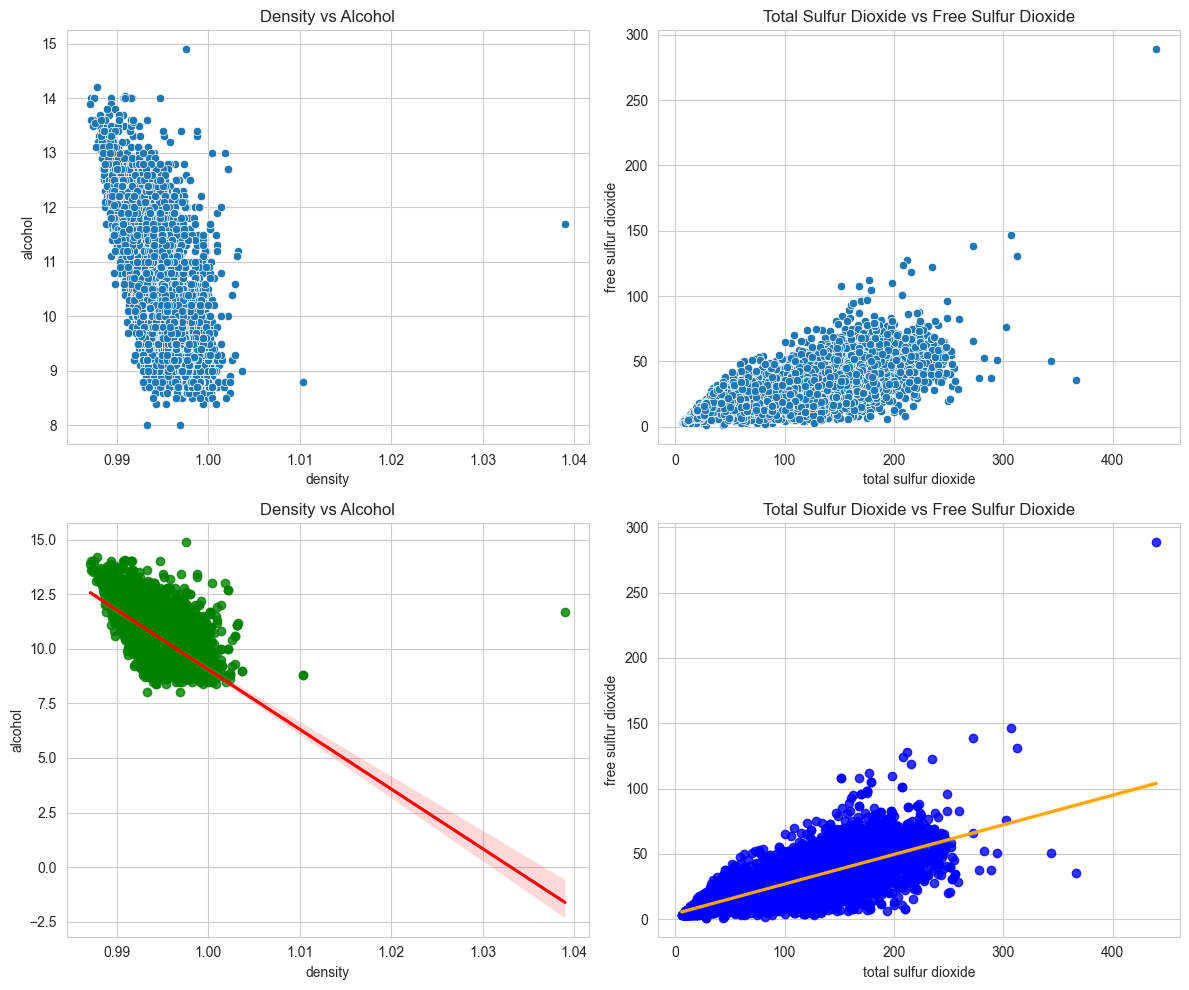

In [26]:
# Tworzenie wykresów punktowych
plt.figure(figsize=(12, 10))

# density vs alcohol
plt.subplot(2, 2, 1)
sns.scatterplot(x='density', y='alcohol', data=cleared_data)
plt.title('Density vs Alcohol')

# total sulfur dioxide vs free sulfur dioxide
plt.subplot(2, 2, 2)
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', data=cleared_data)
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')

plt.subplot(2, 2, 3)
sns.regplot(x='density', y='alcohol', data=cleared_data, color='green', line_kws={"color": "red"})
plt.title('Density vs Alcohol')

plt.subplot(2, 2, 4)
sns.regplot(x='total sulfur dioxide', y='free sulfur dioxide', data=cleared_data, color='blue', line_kws={"color": "orange"})
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')


plt.tight_layout()
plt.show()

## Conclusions

1. Interrelationships Between Features:

Density vs Alcohol: There is a negative correlation between density and alcohol content. Wines with lower density typically have a higher alcohol content.
Total Sulfur Dioxide vs Free Sulfur Dioxide: These show a positive correlation, suggesting that wines with a higher amount of total sulfur dioxide generally also have more free sulfur dioxide.
Type vs Volatile Acidity and Total Sulfur Dioxide: These plots might indicate differences in chemical profiles between red and white wines. For example, white wines might have higher sulfur dioxide content.


2. Quality Differentiation:

The quality of wine (as indicated in the data) might be associated with several chemical parameters. The correlation analysis can point out which parameters are most significant.

3. Missing Data:

The removal of rows with missing data might impact the modeling results, especially if the missing data is not completely random.



## Recommendation for Machine Learning Modeling

1. Preprocessing:
    - Encoding Categorial Variables (Wine types)
    - Feature Scaling (Normalization or standarization)

2. Algorithm Choice:
    - Regression problem (predicting a specific quality score of wine)
     for example: Ridge/Lasso Regression or Decision Trees.

3. Cross-Validation and Hyperparameter Tuning
4. Model Evaluation
5. Model Interpretability
